<a href="https://colab.research.google.com/github/Alejandrooct/AI-course/blob/main/AI_course_day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##AI course
##Day#4 (Wednesday December 6, 2023)
##Assignement: Drone Data Preprocessing

name: Alejandro Thamm

The exercise involves:
- extracting drone location (within each image),
- creating labeled datasets,
- building a simple classifier using TensorFlow.

link to the Assignement description:
https://docs.google.com/document/d/1qKI6AzhIfNc3bX6lFikTI_qDq-VNN7OKmlZpW0ZygIc/edit


# 1 - Data Exploration:
   - Access the drive in this link:

https://drive.google.com/drive/folders/1--E2a3ior8D_isWan7ePmd_NmsNcy6Uk

it contains the images and the labels.

   - Observe the structure of the data. Each image has a corresponding label file written in a yolov8 format.

In [ ]:
# Step 1A - Accessing the data

# The shared folder contains 1616 files (808 image, label pairs).
# Googledrive is very tricky when folders contain a few hundreds of files.
# To avoid the issues associated with working with many files from googledrive,
# I downloaded all the files in smalled groups (like 400 or at most 800) files,
# After downloading to my local computer, I zipped the files (about 75 MB)
# then I uploaded the zip file to the colab notebook.
# And uncompressed the files in the colab notebook.


In [ ]:
# Step 1B - Assesing the data

# There are 808 image files in .jpg format with a corresponding .txt label file.
# The annotation is bounding boxes (BB)
# Each BB is determined by 5 numbers
#   number#1: class (class = 0 manes drone)
#   number#2: x_center (normalized to image width)
#   number#3: y_center (normalized to image height)
#   number#4: x_width (normalized to image width)
#   number#5: y_height (normalized to image height)
# Most images have just one BB (one line in the yolo file)
# A few images have 2 BBs (two lines in the yolo file)

#Step 2 - Data Preprocessing:
For each image:

A - Extract the drone's location from the label file (yolov8
format).

B - Find the bounding box of the drone in the image.

C - Create a new image by cropping the bounding box.

D - Convert the cropped image to black and white.

E - Resize the image to a quadratic form (e.g., 28x28) using Keras library.

F - Save the processed image in a list along with the appropriate label (drone).

G - Repeat the above steps, but this time take a random crop of the image with the same quadratic resolution.

H - Save the random cropped image in a separate list along with the appropriate label (not a drone).


In [ ]:
# Step 2 (Data Preprocessing)
# A - Extract the drone's location from the label file (yolov8 format).
# B - Find the bounding box of the drone in the image.
#
# We will
# 1 - upload the dataset to the colab notebook in folder: 'drones_1')
# 2 - read the annotation files, and write the files into folder: 'drones_2'
#     adding a visible bounding box in yellow.


In [ ]:
# Step 2 (Data Preprocessing)
# upload the dataset into the colab notebook

# Make a folder in the colab notebook, under /content/ named "drones_1"
#  this folder is for the original files as found in the source Googledrive.
! mkdir /content/drones_1
# upload manually from the hard disk of my laptop a dataset in a zip file.
#   This file is named drones_1.zip (76.1 MB in googledrive)(72.54 MB in colab))
#   Upload it into /content/
# unzip the file into these folder, the synthax is:
# unzip <source filename>       -d <destination folder>
! unzip /content/drones_1.zip -d /content/drones_1

In [ ]:
# For deleting the output folder during debugging

import os
import shutil
if os.path.exists('/content/drones_1'):
    shutil.rmtree('/content/drones_1')
# shutil.rmtree('/content/drones', ignore_errors=True)
# ! mkdir /content/drones_1

In [ ]:
# Step 2 (Data Preprocessing)
# use ChatGPT to make a python script to        add the yellow BB to the images.
#                           reads /content/drones_1 and writes /content/drones_2

# Ignore all previous instructions.
# Act as a world class python programmer.
# Write code for a google colab notebook in python.
# Read the files in /content/drones_1/
# These are in pairs.
# For each file name, you will find a .jpg image file and a .txt file.
# The .txt file contains the yoloV8 labels for the corresponding image file.
# Each line of the label file is a label:
# The first number in the line is the class.
# Then 4 coordinates follow:
#   val#1: is the normalized xcenter, multiply by image width to get pixels.
#   val#2: is the normalized ycenter, multiply by image height to get pixels.
#   val#3: is the normalized box width, multiply by image width to get pixels.
#   val#4: is the normalized box height, multiply by image height to get pixels.
# For each image do the following:
# Add to the image a rectangle around the bounding box, 1 pixel bigger than the bounding box, and one pixel in width, in yellow color.
# Show the image with the corresponding rectangles ovelayed.
# Use matplotlib to show the images
# Save the image with the rectangle in folder: /content/drones_2


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Path to the folder containing image and label pairs
folder_path = '/content/drones_1/'

# Output folder for saving images with rectangles
output_folder = '/content/drones_2/'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Get a list of all files in the folder
file_list = os.listdir(folder_path)

# Filter files to include only .txt files
label_files = [file for file in file_list if file.endswith('.txt')]

# Process each label file
for label_file in label_files:
    # Construct the corresponding image file name
    image_file = label_file.replace('.txt', '.jpg')

    # Read the image
    image_path = os.path.join(folder_path, image_file)
    img = cv2.imread(image_path)

    # Read the labels from the YOLO format
    label_path = os.path.join(folder_path, label_file)
    with open(label_path, 'r') as f:
        lines = f.readlines()

    # Process each line in the label file
    for line in lines:
        values = line.split()
        class_label = int(values[0])
        x_center, y_center, box_width, box_height = map(float, values[1:])

        # Convert normalized coordinates to pixel values
        image_height, image_width, _ = img.shape
        x_center *= image_width
        y_center *= image_height
        box_width *= image_width
        box_height *= image_height

        # Calculate coordinates for the rectangle
        x1 = int(x_center - box_width / 2) - 1
        y1 = int(y_center - box_height / 2) - 1
        x2 = int(x_center + box_width / 2) + 1
        y2 = int(y_center + box_height / 2) + 1

        # Draw the rectangle on the image
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 255), 1)

    # Display the image with rectangles
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Save the image with the rectangle
    output_path = os.path.join(output_folder, image_file)
    cv2.imwrite(output_path, img)


In [ ]:
# For deleting the output folder during debugging
#
import shutil
shutil.rmtree('/content/drones_2')
#

In [ ]:
# Step 2 (Data Preprocessing)
# use ChatGPT to make a python script                  for cropping just the BB.
#                          read /contents/drones_1 and writes /contents/drones_3

# Ignore all previous instructions.
# Act as a world class python programmer.
# Write code for a google colab notebook in python.
# Read the files in /content/drones_1/
# These are in pairs.
# For each file name, you will find a .jpg image file and a .txt file.
# The .txt file contains the yoloV8 labels for the corresponding image file.
# Each line of the label file is a label:
# The first number in the line is the class.
# Then 4 coordinates follow:
#   val#1: is the normalized xcenter, multiply by image width to get pixels.
#   val#2: is the normalized ycenter, multiply by image height to get pixels.
#   val#3: is the normalized box width, multiply by image width to get pixels.
#   val#4: is the normalized box height, multiply by image height to get pixels.
# For each image do the following:
# Crop the image to the bounding box.
# Show the cropped image.
# Use matplotlib to show the images
# Save the cropped image with the name of the original image, in folder: /content/drones_3


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Define the paths
input_folder = '/content/drones_1/'
output_folder = '/content/drones_3/'

# Create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# List all files in the input folder
files = os.listdir(input_folder)

# Iterate through the files in pairs
for file in files:
    if file.endswith('.jpg'):
        # Get the corresponding label file
        label_file = file.replace('.jpg', '.txt')

        # Read the image
        image_path = os.path.join(input_folder, file)
        img = cv2.imread(image_path)
        height, width, _ = img.shape

        # Read the corresponding label file
        label_path = os.path.join(input_folder, label_file)
        with open(label_path, 'r') as f:
            lines = f.readlines()

        # Process each line in the label file
# ------------------------------------------------------------------------------
        #or line in lines:
        for j, line in enumerate(lines):
# ------------------------------------------------------------------------------
            # Parse the label information
            class_id, x_center, y_center, box_width, box_height = map(float, line.split())

            # Convert normalized coordinates to pixel values
            x_center *= width
            y_center *= height
            box_width *= width
            box_height *= height

            # Calculate bounding box coordinates
            x1 = int(x_center - 0.5 * box_width)
            y1 = int(y_center - 0.5 * box_height)
            x2 = int(x_center + 0.5 * box_width)
            y2 = int(y_center + 0.5 * box_height)

            # Crop the image
            cropped_img = img[y1:y2, x1:x2, :]

            # Show the cropped image using matplotlib
            plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.show()

            # Save the cropped image
# ------------------------------------------------------------------------------
            #utput_path = os.path.join(output_folder, f"{file.split('.')[0]}_{int(x_center)}_{int(y_center)}.jpg")
            if (j == 0):
                output_path = os.path.join(output_folder, file)
            else:
                output_path = os.path.join(output_folder, file.split('.')[0] + '_' + str(j) + ".jpg")
# ------------------------------------------------------------------------------
            cv2.imwrite(output_path, cropped_img)


In [ ]:
# For deleting the output folder during debugging
#
import shutil
shutil.rmtree('/content/drones_3')
#

In [ ]:
# Step 2 (Data Preprocessing)
# use ChatGPT to make a python script for reading the crops and:
#   transforming them into gray-scale.
#   resizing the images to 28 x 28 pixels
#                          read /contents/drones_3 and writes /contents/drones_4

# Ignore all previous instructions.
# Act as a world class python programmer.
# Write code for a google colab notebook in python.
# Read the files in /content/drones_3/
# For each image do the following:
# Transform the image to gray scale, in one channel.
# Resize the image to 28 x 28 pixels
# Save the modified image with the name of the original image, in folder: /content/drones_4
# For the last image, check how many channels the modified image has print this result.

In [ ]:
import cv2
import os

# Define the input and output directories
input_directory = '/content/drones_3/'
output_directory = '/content/drones_4/'

# Ensure the output directory exists
os.makedirs(output_directory, exist_ok=True)

# List all files in the input directory
image_files = [f for f in os.listdir(input_directory) if os.path.isfile(os.path.join(input_directory, f))]

# Process each image
for i, image_file in enumerate(image_files):
    # Read the image
    image_path = os.path.join(input_directory, image_file)
    original_image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Resize the image to 28x28 pixels
    resized_image = cv2.resize(gray_image, (28, 28))

    # Save the modified image to the output directory
    output_path = os.path.join(output_directory, image_file)
    cv2.imwrite(output_path, resized_image)

    # Check the number of channels for the last image
    if i == len(image_files) - 1:
        num_channels = resized_image.shape[2]
        print(f"The number of channels for the last processed image is: {num_channels}")

print("Image processing and saving completed.")


IndexError: ignored

In [ ]:
# this is the old code that worked
import os
from PIL import Image
import cv2

# Define the input and output directories
input_directory = '/content/drones_3/'
output_directory = '/content/drones_4/'

# Ensure the output directory exists, create if not
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# List all files in the input directory
file_list = os.listdir(input_directory)

# Process each image in the input directory
for file_name in file_list:
    # Construct the file paths
    input_path = os.path.join(input_directory, file_name)
    output_path = os.path.join(output_directory, file_name)

    # Read the image
    image = cv2.imread(input_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize the image to 28x28 pixels
    resized_image = cv2.resize(gray_image, (28, 28))

    # Save the modified image to the output directory
    cv2.imwrite(output_path, resized_image)

print("Image processing complete.")


Image processing complete.


In [ ]:
# For deleting the output folder during debugging
#
import shutil
shutil.rmtree('/content/drones_4')
#

Now that all images (of drones) have been processed,
Let's make a backup of them.


In [ ]:
# for making zip files with the folders we just creted.
#
# These are the images with the overlayed bounding box visible
!zip drones_2.zip /content/drones_2/*
# These are the cropped bounding boxes.
!zip drones_3.zip /content/drones_3/*
# These are the bounding boxes set to gray scale and resized to 28 x 28
!zip drones_4.zip /content/drones_4/*#

# Step 2 - Data Preprocessing (making de "not_a_drone" dataset)

G - Repeat the above steps, but this time take a random crop of the image with the same quadratic resolution.

In [ ]:
# Step 2 (Data Preprocessing)
# use ChatGPT to make a python script            for cropping for "not_a_drone".
#                          read /contents/drones_1 and writes /contents/drones_5

# Ignore all previous instructions.
# Act as a world class python programmer.
# Write code for a google colab notebook in python.
# Read the files in /content/drones_1/
# These are in pairs.
# For each file name, you will find a .jpg image file and a .txt file.
# The .txt file contains the yoloV8 labels for the corresponding image file.
# Each line of the label file is a label:
# The first number in the line is the class.
# Then 4 values as follow:
#   val#1: disregard this value.
#   val#2: disregard this value.
#   val#3: is the normalized box width, multiply by image width to get pixels.
#   val#4: is the normalized box height, multiply by image height to get pixels.
# For each image do the following:
# Determine a random x_center between (box width/2) and (image width -box width/2)
# Determine a random y_center between (box height/2) and (image height -box height/2)
# Make a crop of the image with this x_center and y_center,  and width = box width, and height = box height.
# Show the cropped image.
# Use matplotlib to show the images
# Save the cropped image with the name of the original image, in folder: /content/drones_5


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Set the path to the directory containing image and label files
data_path = '/content/drones_1/'

# Create a directory to save cropped images
output_path = '/content/drones_5/'
os.makedirs(output_path, exist_ok=True)

# Function to read YOLO labels from a text file
def read_yolo_labels(label_path):
    with open(label_path, 'r') as file:
        lines = file.readlines()

    # Extract class, x_center, y_center, box_width, and box_height from each line
    labels = []
    for line in lines:
        parts = line.strip().split()
        if len(parts) == 5:
            label = {
                'class': int(parts[0]),
                'x_center': float(parts[1]),
                'y_center': float(parts[2]),
                'box_width': float(parts[3]),
                'box_height': float(parts[4])
            }
            labels.append(label)

    return labels

# Function to perform cropping and save the cropped image
def crop_and_save(image_path, label_path, output_folder):
    # Read image and labels
    image = cv2.imread(image_path)
    labels = read_yolo_labels(label_path)

    for label in labels:
        # Calculate absolute coordinates
        img_height, img_width, _ = image.shape
        x_center_abs = int(label['x_center'] * img_width)
        y_center_abs = int(label['y_center'] * img_height)
        box_width_abs = int(label['box_width'] * img_width)
        box_height_abs = int(label['box_height'] * img_height)

        # Calculate random x and y centers within the valid range
        x_center_crop = np.random.randint(box_width_abs // 2, img_width - box_width_abs // 2)
        y_center_crop = np.random.randint(box_height_abs // 2, img_height - box_height_abs // 2)

        # Calculate crop coordinates
        x1 = x_center_crop - box_width_abs // 2
        y1 = y_center_crop - box_height_abs // 2
        x2 = x_center_crop + box_width_abs // 2
        y2 = y_center_crop + box_height_abs // 2

        # Crop the image
        cropped_image = image[y1:y2, x1:x2, :]

        # Show the cropped image using matplotlib
        plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
        plt.title(f'Cropped Image - Class {label["class"]}')
        plt.show()

        # Save the cropped image
        output_filename = os.path.basename(image_path)
        output_path = os.path.join(output_folder, output_filename)
        cv2.imwrite(output_path, cropped_image)
        print(f'Saved cropped image: {output_path}')

# Process each pair of image and label files
for filename in os.listdir(data_path):
    if filename.endswith(".jpg"):
        image_path = os.path.join(data_path, filename)
        label_path = os.path.join(data_path, filename.replace(".jpg", ".txt"))

        # Perform cropping and save the cropped image
        crop_and_save(image_path, label_path, output_path)


In [ ]:
# For deleting the output folder during debugging
#
import shutil
shutil.rmtree('/content/drones_5')
#

In [ ]:
# Step 2 (Data Preprocessing)
# use ChatGPT to make a python script for reading the "not_a_drone"crops and:
#   transforming them into gray-scale.
#   resizing the images to 28 x 28 pixels
#                          read /contents/drones_5 and writes /contents/drones_6

# Ignore all previous instructions.
# Act as a world class python programmer.
# Write code for a google colab notebook in python.
# Read the files in /content/drones_5/
# For each image do the following:
# Transform the image to gray scale.
# Resize the image to 28 x 28 pixels
# Save the modified image with the name of the original image, in folder: /content/drones_6

In [ ]:
import os
from PIL import Image
import cv2

# Define the input and output directories
input_directory = '/content/drones_5/'
output_directory = '/content/drones_6/'

# Ensure the output directory exists, create if not
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# List all files in the input directory
file_list = os.listdir(input_directory)

# Process each image in the input directory
for file_name in file_list:
    # Construct the file paths
    input_path = os.path.join(input_directory, file_name)
    output_path = os.path.join(output_directory, file_name)

    # Read the image
    image = cv2.imread(input_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize the image to 28x28 pixels
    resized_image = cv2.resize(gray_image, (28, 28))

    # Save the modified image to the output directory
    cv2.imwrite(output_path, resized_image)

print("Image processing complete.")


Image processing complete.


In [ ]:
# For deleting the output folder during debugging
#
import shutil
shutil.rmtree('/content/drones_6')
#

In [ ]:
# for making zip files with the folders we just creted.
#
# These are the cropped "not_a_drone" bounding boxes.
#!zip drones_5.zip /content/drones_5/*
# These are the "not_a_drone" bounding boxes set to gray scale and resized to 28 x 28
!zip drones_6.zip /content/drones_6/*


# Step 3 - TensorFlow Datasets:
   - Convert the lists of processed images and labels to TensorFlow datasets.
   - Ensure that the shapes and types of images and labels match TensorFlow's requirements.


In [ ]:
# Ensure that the folders:
#  drones_4 (with theb 840 "drone" images in 28 x 28 is in place.)
#  drones_6 (with theb 808 "not_a_drone" images in 28 x 28 is in place.)


In [ ]:
# upload the dataset into the colab notebook
#                                               make folders drone_4 and drone_6
! mkdir /content/drones_4
! mkdir /content/drones_6
! unzip /content/drones_4.zip -d /content/drones_4
! unzip /content/drones_6.zip -d /content/drones_6


In [ ]:
# for loading the images we just prepared into Tensorflow as datasets,
# we will use the ImageDataGenerator class, from the
# keras.preprocessing.image library.
# we will use also the flow_from_dataframe method.
# This requires to create a pandas dataframe with columns:
#   filename - strings like: "/content/drone_4/image1.jpg"
#   label    - numbers like: 0, 1
# for making this dataframe, we will also use ChtaGP


In [ ]:
# Step 3 (TensorFlow Datasets)
# use ChatGPT to make a python script             for dataframe for the dataset.

# Ignore all previous instructions.
# Act as a world class python programmer.
# Write code for a google colab notebook in python.
# Make a pandas dataframe with name: 'df_drones'.
# This will have two columns: 'Filename' and 'Label'
# Read the files in /content/drones_4/
# for each file in this folder,
# add a line to the dataframe with the path to the filename,
# and set the "Label" to 0.
# Read the files in /content/drones_6/
# for each file in this folder,
# add a line to the dataframe with the path to the filename,
# and set the "Label" to 1.


In [ ]:
import os
import pandas as pd

# Assuming your data is stored in /content/drones_4/ and /content/drones_6/
folder_paths = ['/content/drones_4/', '/content/drones_6/']
labels = ['0', '1']

# Create an empty DataFrame
df_drones = pd.DataFrame(columns=['Filename', 'Label'])

# Iterate through the folders and files to populate the DataFrame
for label, folder_path in zip(labels, folder_paths):
    file_list = os.listdir(folder_path)
    for filename in file_list:
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)

        # Append a new row to the DataFrame
        df_drones = df_drones.append({'Filename': file_path, 'Label': label}, ignore_index=True)


In [ ]:
# Explore the dataframe we just created

# print the DataFrame head
print (df_drones.head())
# print the DataFrame tail
print (df_drones.tail())
# print the dataframe shape
print ()
print ('Shape:', df_drones.shape)


                                       Filename Label
0    /content/drones_4/DJI_FPV_Cloudy (325).jpg     0
1  /content/drones_4/Dji_pantom_Sunny (803).jpg     0
2  /content/drones_4/Dji_pantom_Sunny (423).jpg     0
3            /content/drones_4/video19_1868.jpg     0
4                     /content/drones_4/304.jpg     0
                                         Filename Label
1643   /content/drones_6/DJI_FPV_Sunny (1153).jpg     1
1644            /content/drones_6/video16_156.jpg     1
1645  /content/drones_6/DJI_FPV_Cloudy (1121).jpg     1
1646   /content/drones_6/DJI_FPV_Cloudy (398).jpg     1
1647    /content/drones_6/DJI_FPV_Sunny (339).jpg     1

Shape: (1648, 2)


In [ ]:
# Additionaly the dataframe can be saved as a csv file.
df_drones.to_csv('df_drones.csv', index = False)


# Step 4 - Build Classifier Model:

   - Utilize the knowledge from previous homework (e.g., MNIST Fashion).
   - Split the dataset into training and testing sets.
   - Build a simple classifier model using TensorFlow/Keras.
   - Train the model on the training set and evaluate it on the test set.


In [ ]:
# Step 4 - How to present the data to Tensorflow
#
# 1 - Organize the dataset into directories according to class.
#     Use ImageDataGenerator, from tensorflow.keras.preprocessing.image
# 2 - you can make a dataframe that describes where your dataset resides, and then:
#     Use the ImageDataGenerator class along with the flow_from_dataframe method


In [ ]:
# Organize the dataset into a directory structure.
#
#dataset/
#├── class1/
#│   ├── image1.jpg
#│   ├── image2.jpg
#│   └── ...
#├── class2/
#│   ├── image3.jpg
#│   ├── image4.jpg
#│   └── ...
#└── ...

# You define a train / validation split, like 0.2 (80/20)


In [ ]:
# Step 4 - prapare dataset to load into keras
#          prepare a train set and
#          prepare a validation set

#              load dataset into "tensorflow.keras" using "flow_from_dataframe".
#                                                  split the dataset into 80/20.
# ------------------------------------------------------------------------------
from tensorflow.keras.preprocessing import image
#                                               import keras ImageDataRenerator.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#                     read the dataframe (not needed if previous steps are run).
#df_drones = pd.read_csv("/content/df_drones.csv")
#                                         create an ImageDataGenerator instance:
datagen = ImageDataGenerator(
    rescale         = 1./255,  # rescale pixel values to range [0, 1](normalize)
    #shear_range    = 0.2,     #        shear transformations (for augmentation)
    #zoom_range     = 0.2,     #         zoom transformations (for augmentation)
    #horizontal_flip = True    #             horizontal flips (for augmentation)
)
# ------------------------------------------------------------------------------
#                                            Use the flow_from_dataframe method.
#                                   Specify the percentage for validation split.
validation_split = 0.2
#                                                            set the batch size.
batch_size = 32

img_size   = (28, 28)          #              this is the size de dataset is in.

train_generator = datagen.flow_from_dataframe(
    dataframe        = df_drones,
    x_col            = 'Filename',
    y_col            = 'Label',
    target_size      = img_size,
    batch_size       = batch_size,
    class_mode       = 'binary',   #                   'categorical' or 'binary'
    shuffle          = True,
    validation_split = validation_split
)

# The validation generator will automatically use the remaining data
validation_generator = datagen.flow_from_dataframe(
    dataframe        = df_drones,
    x_col            = 'Filename',
    y_col            = 'Label',
    target_size      = img_size,
    batch_size       = batch_size,
    class_mode       = 'binary',
    shuffle          = True,
    subset           = 'validation'
)


Found 1648 validated image filenames belonging to 2 classes.
Found 0 validated image filenames belonging to 2 classes.


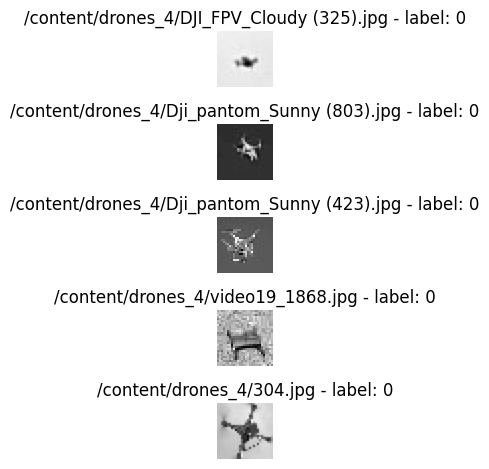

In [ ]:
# Step 4 - sample visualization of the dataset

# Load and display a few flattened images
import matplotlib.pyplot as plt

num_images_to_display = 5

for i in range(num_images_to_display):
    # Load an example image and flatten it
    sample_image_path = df_drones['Filename'][i]
#------------------------------------------------------------------------------
    sample_image = image.load_img(sample_image_path, target_size=img_size)
    sample_image = image.load_img(sample_image_path, color_mode = 'grayscale' ,target_size=img_size)
#------------------------------------------------------------------------------
    sample_image_array = image.img_to_array(sample_image)
    flattened_image = sample_image_array.flatten()

    # Reshape the flattened image back to its original shape
    reshaped_image = flattened_image.reshape(img_size)

    plt.subplot(num_images_to_display, 2, 2 * i + 2)
    plt.imshow(reshaped_image, cmap='gray')  #              use 'gray' colormap.
    plt.title(sample_image_path + ' - label: ' + df_drones['Label'][i])
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Step 4 - Build a simple classifier model using TensorFlow/Keras.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 128)        

In [ ]:
# Train the model

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,  # Adjust the number of epochs based on your dataset and convergence
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/10
51/51 [==============================] - 4s 44ms/step - loss: 0.4073 - accuracy: 0.8459
Epoch 2/10
51/51 [==============================] - 3s 64ms/step - loss: 0.1517 - accuracy: 0.9585
Epoch 3/10
51/51 [==============================] - 2s 36ms/step - loss: 0.1094 - accuracy: 0.9666
Epoch 4/10
51/51 [==============================] - 2s 36ms/step - loss: 0.0888 - accuracy: 0.9697
Epoch 5/10
51/51 [==============================] - 2s 36ms/step - loss: 0.0747 - accuracy: 0.9734
Epoch 6/10
51/51 [==============================] - 2s 38ms/step - loss: 0.0856 - accuracy: 0.9722
Epoch 7/10
51/51 [==============================] - 3s 62ms/step - loss: 0.0652 - accuracy: 0.9802
Epoch 8/10
51/51 [==============================] - 2s 36ms/step - loss: 0.0542 - accuracy: 0.9814
Epoch 9/10
51/51 [==============================] - 2s 36ms/step - loss: 0.0481 - accuracy: 0.9851
Epoch 10/10
51/51 [==============================] - 2s 36ms/step - loss: 0.0438 - accuracy: 0.9882


KeyError: ignored

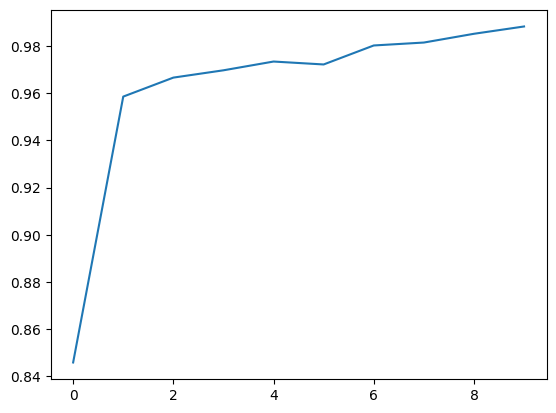

In [ ]:
# After training, you can visualize the training history and make adjustments

import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Step 5 - Visualization and Analysis:
   - Plot some images from the dataset to visually inspect the processed images.
   - Display the accuracy of the trained model on the test set.
   - Think about potential improvements or additional steps in the preprocessing and model building phases.


Questions to think about:

Data Preprocessing:

- Why is it good to convert images to black and white?

*A color image will have exactly 3 times more features than the gray-scale image. Also gray-scale images are amost invariant to illumination changes (light color, light intensity, diffuse light, direct light, etc.) RGB images will have drastic changes under different lighting conditions. "A blue drone, is also a drone, and a green camel is still a green camel" (what differentiates a drone from a camel is not the color)*

- How does resizing impact the training of machine learning models?

*A big sized image (let's say 512 x 512) will have 250 K features which is too much for a NN. Small images, like 28 x 28 pixels, will have 784 features, which is a big number, but not impossible to manage.*

TensorFlow Datasets and Model Building:

- Why is it important to have consistent shapes and data types in TensorFlow datasets?

*A tensorflow dataset with different number of features, or simply with different data types will simply be unable to learn meaningfuly.*

- How does the choice of activation function impact the model's performance?

*The choice of the activation function at each level in the model architecture is key to decide which neuron output should the propagated to the next level.*

- What can be done to improve the model's accuracy?

*1 - on one side: decisions regarding model architecture. This will impact in model accuracy and model performance (runtime speed).*
*2 - on the other side: the quality of the training data: like quality of the labelling done (ground truths) and a selection of data that matches real-world conditions*
*As an example of these:*
*- bounding boxes larger or smaller than the actual object will impact in model preformance.*
*- all traning data in which drones are always against a clear sky background, and "no_drones" as clear sky images, will result that:*
*a - if a drone has a tree background it will not be detected (false negative)*
*b - a bird against a clear sky will be detected as drone (false positive)*


Tips:
- Break down the problem into smaller steps and tackle each one iteratively.
- Start by trying the preprocess on only one image, visualize the results and check the shape of the image, and then proceed and preprocess all the dataset.
- Experiment with the images resolution, different activation functions, and different model’s architectures!

This exercise combines practical coding skills with machine learning concepts, allowing you to apply your knowledge to real-world scenarios. Good luck and enjoy!


In [ ]:
# some additonal code used to troubleshoot an issue in which 1 channel images
# were being loaded as 3 channel images.
# (keras image.load_img will by default load images as 3 channels
# changing the number of fatures of the dataset from 28 x 28 = 784
# to 2352 = 28 x 28 x 3 )

# check number of channels of an image
#
from PIL import Image

def get_number_of_channels(image_path):
    # Open the image
    with Image.open(image_path) as img:
        # Get the number of channels
        channels = img.getbands()
        return channels

# Example usage
image_path = '/content/drones_6/119.jpg'

channels = get_number_of_channels(image_path)

print(f"The image has {len(channels)} channel(s): {channels}")


The image has 1 channel(s): ('L',)
